In [1]:
from tensorflow import keras
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FIRAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FIRAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data_train=pd.read_excel('C:/Users/FIRAS/Desktop/Ref NLP/work/dataset_marrocain.xlsx')
data_train.shape

(1549, 2)

In [3]:
data_train.head


<bound method NDFrame.head of                                             Commentaire   Classe
0      محند اعطيك الاختيارات ههههه و انت احسن الظن ف...   normal
1        إبراهيم الجعفري رئيس وزراء العراق إلتون جون...  abusive
2      لماذا عندما نتصفح الإنترنت نشعر أن الكل من نف...   normal
3     تريد دابا كنقادو بروغرام ديال الصيف ههه بنادم ...   normal
4       مكنهدرش على باغي الفلوس على ود راحة البال اه...     hate
...                                                 ...      ...
1544   يفكّرونَ رَبَّنَا الجنسيات والعربية للسعودين ...   normal
1545                                     قل يامُسخّر لك   normal
1546  تبغي تحماقغير الزمراوي فالاوزان المزيرية والقو...   normal
1547  بقى برشيلونة بالقراءة المصنّفة بريطانيا الصهيو...   normal
1548  لكن منتقلقوش كيتعرضوا والسجادة وتفرّقهم بروفاي...   normal

[1549 rows x 2 columns]>

In [4]:
data_train.columns


Index(['Commentaire', 'Classe'], dtype='object')

In [5]:
data_train.describe()

,Commentaire,Classe
count,1548,1549
unique,1485,3
top,هاد ناس برشيد عالام تحية للعنصرية النسوي,normal
freq,12,1361


In [6]:
data_train.isnull().sum()


Commentaire    1
Classe         0
dtype: int64

In [7]:
data_train=data_train.dropna()

In [8]:
data_train.isnull().any()

Commentaire    False
Classe         False
dtype: bool

In [9]:
data_train['Classe'].value_counts()

normal     1360
hate        166
abusive      22
Name: Classe, dtype: int64

<AxesSubplot:title={'center':'Classe Distribution'}>

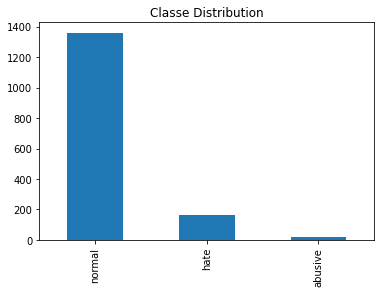

In [10]:
data_train.Classe.value_counts().plot.bar(x=data_train.Classe.unique(), title='Classe Distribution')


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train['Label']=le.fit_transform(data_train['Classe'])
data_train.head(6)

C:\Users\FIRAS\AppData\Local\Temp\ipykernel_6944\1070480500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Label']=le.fit_transform(data_train['Classe'])


,Commentaire,Classe,Label
0,محند اعطيك الاختيارات ههههه و انت احسن الظن ف...,normal,2
1,إبراهيم الجعفري رئيس وزراء العراق إلتون جون...,abusive,0
2,لماذا عندما نتصفح الإنترنت نشعر أن الكل من نف...,normal,2
3,تريد دابا كنقادو بروغرام ديال الصيف ههه بنادم ...,normal,2
4,مكنهدرش على باغي الفلوس على ود راحة البال اه...,hate,1
5,راه لي مقتنع بلي هاد التضامن على المواقع حام...,hate,1


In [12]:
data_train['word_count'] = data_train['Commentaire'].apply(lambda x : len(x.split()))
data_train

C:\Users\FIRAS\AppData\Local\Temp\ipykernel_6944\556673699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['word_count'] = data_train['Commentaire'].apply(lambda x : len(x.split()))


,Commentaire,Classe,Label,word_count
0,محند اعطيك الاختيارات ههههه و انت احسن الظن ف...,normal,2,47
1,إبراهيم الجعفري رئيس وزراء العراق إلتون جون...,abusive,0,117
2,لماذا عندما نتصفح الإنترنت نشعر أن الكل من نف...,normal,2,345
3,تريد دابا كنقادو بروغرام ديال الصيف ههه بنادم ...,normal,2,17
4,مكنهدرش على باغي الفلوس على ود راحة البال اه...,hate,1,44
...,...,...,...,...
1544,يفكّرونَ رَبَّنَا الجنسيات والعربية للسعودين ...,normal,2,31
1545,قل يامُسخّر لك,normal,2,3
1546,تبغي تحماقغير الزمراوي فالاوزان المزيرية والقو...,normal,2,58
1547,بقى برشيلونة بالقراءة المصنّفة بريطانيا الصهيو...,normal,2,45


In [13]:
import re
import pyarabic.araby as araby

prefix_list = [
    "ال",
    "و",
    "ف",
    "ب",
    "ك",
    "ل",
    "لل",
    "\u0627\u0644",
    "\u0648",
    "\u0641",
    "\u0628",
    "\u0643",
    "\u0644",
    "\u0644\u0644",
    "س",
]
suffix_list = [
    "ه",
    "ها",
    "ك",
    "ي",
    "هما",
    "كما",
    "نا",
    "كم",
    "هم",
    "هن",
    "كن",
    "ا",
    "ان",
    "ين",
    "ون",
    "وا",
    "ات",
    "ت",
    "ن",
    "ة",
    "\u0647",
    "\u0647\u0627",
    "\u0643",
    "\u064a",
    "\u0647\u0645\u0627",
    "\u0643\u0645\u0627",
    "\u0646\u0627",
    "\u0643\u0645",
    "\u0647\u0645",
    "\u0647\u0646",
    "\u0643\u0646",
    "\u0627",
    "\u0627\u0646",
    "\u064a\u0646",
    "\u0648\u0646",
    "\u0648\u0627",
    "\u0627\u062a",
    "\u062a",
    "\u0646",
    "\u0629",
]
other_tokens = ["[رابط]", "[مستخدم]", "[بريد]"]

# the never_split list is ussed with the transformers library
prefix_symbols = [x + "+" for x in prefix_list]
suffix_symblos = ["+" + x for x in suffix_list]
never_split_tokens = list(set(prefix_symbols + suffix_symblos + other_tokens))

regex_url_step1 = r"(?=http)[^\s]+"
regex_url_step2 = r"(?=www)[^\s]+"
regex_url = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
regex_mention = r"@[\w\d]+"
regex_email = r"\S+@\S+"
redundant_punct_pattern = (
    r"([!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛\s+«–…‘]{2,})"
)


def remove_elongation(word):
    """
	:param word:  the input word to remove elongation
	:return: delongated word
	"""
    regex_tatweel = r"(\w)\1{2,}"
    # loop over the number of times the regex matched the word
    for index_ in range(len(re.findall(regex_tatweel, word))):
        if re.search(regex_tatweel, word):
            elongation_found = re.search(regex_tatweel, word)
            elongation_replacement = elongation_found.group()[0]
            elongation_pattern = elongation_found.group()
            word = re.sub(
                elongation_pattern, elongation_replacement, word, flags=re.MULTILINE
            )
        else:
            break
    return word


def tokenize_arabic_words_farasa(line_input, farasa_segmenter, use_farasapy):
    if use_farasapy:
        if type(farasa_segmenter).__name__ == "FarasaSegmenter":
            line_farasa = farasa_segmenter.segment(line_input).split()
        else:
            raise TypeError(
                'use_farsapy is set to True. farasa must be a "py4j.java_gateway.JavaObject"'
            )
    else:
        if type(farasa_segmenter).__name__ == "JavaObject":
            line_farasa = farasa_segmenter.segmentLine(line_input)
        else:
            raise TypeError(
                'use_farsapy is set to False. farasa must be a "FarasaSegmenter" instance from farasapy.segmenter'
            )
    segmented_line = []
    for index, word in enumerate(line_farasa):
        if word in ["[", "]"]:
            continue
        if word in ["رابط", "بريد", "مستخدم"] and line_farasa[index - 1] in ["[", "]"]:
            segmented_line.append("[" + word + "]")
            continue
        segmented_word = []
        for token in word.split("+"):
            if token in prefix_list:
                segmented_word.append(token + "+")
            elif token in suffix_list:
                segmented_word.append("+" + token)
            else:
                segmented_word.append(token)
        segmented_line.extend(segmented_word)
    return " ".join(segmented_line)


def remove_redundant_punct(text):
    text_ = text
    result = re.search(redundant_punct_pattern, text)
    dif = 0
    while result:
        sub = result.group()
        sub = sorted(set(sub), key=sub.index)
        sub = " " + "".join(list(sub)) + " "
        text = "".join(
            (text[: result.span()[0] + dif], sub, text[result.span()[1] + dif :])
        )
        text_ = "".join((text_[: result.span()[0]], text_[result.span()[1] :])).strip()
        dif = abs(len(text) - len(text_))
        result = re.search(redundant_punct_pattern, text_)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


def preprocess(text, do_farasa_tokenization=True, farasa=None, use_farasapy=False):
    """
	Preprocess takes an input text line an applies the same preprocessing used in araBERT 
				pretraining
	
	Note: a farasapy segmenter is ~6x faster than the py4j.java_gateway, consider setting use_farasapy=True
	Farsa Segmentation will soon be fully migrated to farasapy, and support for the py4j.java_gateway.JavaObject will be removed
	Args:
		text (string): inout text string
		farasa (JavaGateway): pass a "py4j.java_gateway.JavaObject" to the FarasaSegmenter.jar file 
		farasa (FarasaSegmenter): pass a FarasaSegmenter instance from farasapy.segmenter
		use_farasapy (boolean): set it to True when using a FarasaSegmenter instance from farasapy.segmenter
	Example: 
		from py4j.java_gateway import JavaGateway
		gateway = JavaGateway.launch_gateway(classpath='./FarasaSegmenterJar.jar')
		farasa = gateway.jvm.com.qcri.farasa.segmenter.Farasa()
		processed_text = preprocess("Some_Text",do_farasa_tokenization=True , farasa=farasa)
	"""
    text = str(text)
    processing_tweet = araby.strip_tashkeel(text)
    processing_tweet = re.sub(r"\d+\/[ء-ي]+\/\d+\]", "", processing_tweet)
    processing_tweet = re.sub("ـ", "", processing_tweet)
    processing_tweet = re.sub("[«»]", ' " ', processing_tweet)
    # replace the [رابط] token with space if you want to clean links
    processing_tweet = re.sub(regex_url_step1, "[رابط]", processing_tweet)
    processing_tweet = re.sub(regex_url_step2, "[رابط]", processing_tweet)
    processing_tweet = re.sub(regex_url, "[رابط]", processing_tweet)
    processing_tweet = re.sub(regex_email, "[بريد]", processing_tweet)
    processing_tweet = re.sub(regex_mention, "[مستخدم]", processing_tweet)
    processing_tweet = re.sub("…", r"\.", processing_tweet).strip()
    processing_tweet = remove_redundant_punct(processing_tweet)

    processing_tweet = re.sub(
        r"\[ رابط \]|\[ رابط\]|\[رابط \]", " [رابط] ", processing_tweet
    )
    processing_tweet = re.sub(
        r"\[ بريد \]|\[ بريد\]|\[بريد \]", " [بريد] ", processing_tweet
    )
    processing_tweet = re.sub(
        r"\[ مستخدم \]|\[ مستخدم\]|\[مستخدم \]", " [مستخدم] ", processing_tweet
    )

    processing_tweet = remove_elongation(processing_tweet)
    if do_farasa_tokenization and farasa is not None:
        processing_tweet = tokenize_arabic_words_farasa(
            processing_tweet, farasa, use_farasapy
        )
    return processing_tweet.strip()

In [14]:
y_train=data_train['Label']
X_train=data_train['Commentaire']

In [15]:
X_train = X_train.apply(preprocess)

In [16]:
X_train[5] ### Après preprocessing

'راه لي مقتنع بلي هاد التضامن على المواقع حامض و معندو باش يفيد و بعقلو راه گاع ممسوق لهاد الحركات داخ شكاتسنا من واحد الطموح ديالو منحصر فانه يكون عندو كدوي مع راجل فالمسائل اليدنية كيبقى يجبدلك الحجاب و الارث و الزواج ه بحالي هو لي عيكوز نهار دخلة هه دوي بالعلم ديور كيرتاحوا فيهم بنات الناس دار واليديهم او دار رجالهم لا عادي ه غي انت كدري متقدش تخيل راسك بنت كل و خليقتو ترجلوا شوية الى تبعنى الزين انصدقوا فطوانغ الا دق عليك شي واحد غي حاول تجنبو حيت هو جاي بدك الفكرة ديال غي باغي يطلعها وانت اتحاوب منيتك وفهاد الحالة ديما اتخسر لي مريض بينا الله يشافيه عيد مبارك سعيد أدخله الله عليك بالنجاح والتوفيق في مسارك الدراسي و وبشي حجة للوالدين إن شاء الله ️ إذ لم توفر خبزا للفقراء لن يتوفر الأمن للاغنياء تمشي درب دويرة فغزة وتجي برب تا تكتب على القضية الفليسطسنة فلحمك بمسمار ماشي غي فتويتر واش تويتر بلاصة يسول فيها الواحد وش حسابليك مفلويك الشيخ الازهر باش يبقى يجاوبك را الاغلبية هنا ميكون غي الخير عندك عقل خصك غ الزين تلفتونا الله تلفها عليكم احكومة الحبس منطقة واحد منطقة جوج ممنوع تجمعات م

In [17]:
data_train['Commentaire'][5]

'راه لي  مقتنع بلي هاد التضامن على  المواقع حامض و معندو باش يفيد و بعقلو راه گاع ممسوق لهاد الحركات داخ شكاتسنا من واحد الطموح ديالو منحصر فانه يكون عندو كدوي مع راجل فالمسائل اليدنية كيبقى يجبدلك الحجاب و الارث و الزواج ههه بحالي هو لي عيكوز نهار دخلة هههه دوي بالعلم ديور كيرتاحوا فيهم بنات الناس دار واليديهم او دار رجالهم لا عادي ههه غي انت كدري متقدش تخيل راسك بنت كل و خليقتو ترجلوا شوية الى تبعنى الزين انصدقوا فطوانغ الا دق عليك شي واحد غي حاول تجنبو حيت هو جاي بدك الفكرة ديال غي باغي يطلعها وانت اتحاوب منيتك وفهاد الحالة ديما اتخسر لي مريض بينا الله يشافيه عيد مبارك سعيد أدخله الله عليك بالنجاح والتوفيق في مسارك الدراسي و وبشي حجة للوالدين إن شاء الله ️ إذ لم توفر خبزا للفقراء لن يتوفر الأمن للاغنياء تمشي درب دويرة فغزة وتجي برب تا تكتب على القضية الفليسطسنة فلحمك بمسمار ماشي غي فتويتر واش تويتر بلاصة يسول فيها الواحد وش حسابليك مفلويك الشيخ الازهر باش يبقى يجاوبك را الاغلبية هنا ميكون غي الخير عندك عقل خصك غ الزين تلفتونا الله تلفها عليكم احكومة الحبس منطقة واحد منطقة جوج ممنوع 

In [18]:
import pandas as pd 

from sklearn.model_selection import train_test_split

from pathlib import Path

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import pytorch_lightning as pl

import transformers
from transformers import BertTokenizerFast, BertModel, Trainer, TrainingArguments, AdamW, get_linear_schedule_with_warmup

In [19]:
# splitting the data into target and feature
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

train_texts, temp_texts, train_labels, temp_labels = train_test_split(data_train['Commentaire'], data_train['Classe'], random_state=42, 
                                                                    test_size=0.3)

train_texts=train_texts.apply(preprocess)
temp_texts=temp_texts.apply(preprocess)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)

len(train_texts), len(val_texts), len(test_texts)

(1083, 232, 233)

In [20]:
BERT_MODEL_NAME = 'alger-ia/dziribert'

tokenizer = BertTokenizerFast.from_pretrained(BERT_MODEL_NAME)

Token indices sequence length is longer than the specified maximum sequence length for this model (775 > 512). Running this sequence through the model will result in indexing errors


<AxesSubplot:>

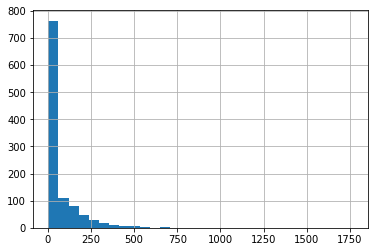

In [21]:
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [22]:
max_seq_len = 40

train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, return_token_type_ids=False, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, return_token_type_ids=False, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, return_token_type_ids=False, max_length=max_seq_len)

In [23]:
class Dataset(torch.utils.data.Dataset):
	def __init__(self, encodings, labels=None):
		self.encodings = encodings
		self.labels = labels

	def __getitem__(self, idx):
		item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
		if self.labels:
			item["labels"] = torch.tensor(self.labels[idx])
			#print(item)
		return item

	def __len__(self):
		print(len(self.encodings["input_ids"]))
		return len(self.encodings["input_ids"])


# prepare dat for classification

tokenizer = XXXTokenizer.from_pretrained(model_name)
	print("Transform xml file to pandas series core...")
	text, file_name = transform_xml_to_pd(file)  # transform xml file to pd
	
	# Xtest_emb, s = get_xxx_layer(Xtest['sent'], path_to_model_lge)  # index 2 correspond to sentences
	#print(text)
	
	print("Preprocess text with spacy model...")
	clean_text = make_new_traindata(text['sent'])
	#print(clean_text[1])  # clean text ; 0 = raw text ; and etc...
	
	X = list(clean_text)
	X_text_tokenized = []
	
	for x in X:
		#print(type(x))
		x_encoded = tokenizer(str(x), padding="max_length", truncation=True, max_length=512)
		#print(type(x_encoded))
		#print(x_encoded)
		X_text_tokenized.append(x_encoded)

IndentationError: unexpected indent (4114022534.py, line 21)

In [24]:
def list_of_dicts_to_dict_of_lists(d):
    dic = d[0]
    keys = dic.keys()
    values = [dic.values() for dic in d]
    return {k: list(v) for k, v in zip(keys, zip(*values))}

train_dataset = Dataset(list_of_dicts_to_dict_of_lists(X_text_tokenized))



NameError: name 'X_text_tokenized' is not defined

In [25]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(preds, labels):
    preds = preds.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [29]:
torch.cuda.empty_cache()

In [30]:
model_1 = BertModel.from_pretrained(BERT_MODEL_NAME)

OSError: Unable to load weights from pytorch checkpoint file for 'C:\Users\FIRAS/.cache\huggingface\transformers\c179cf24640b1b0dda4446337f9b96b5c03874251d8f55598a0c05fb34f62a25.9fcdc9919e76b1cfb4bd7813db6afefee31f549a2de09ab0105e38953d8d7781' at 'C:\Users\FIRAS/.cache\huggingface\transformers\c179cf24640b1b0dda4446337f9b96b5c03874251d8f55598a0c05fb34f62a25.9fcdc9919e76b1cfb4bd7813db6afefee31f549a2de09ab0105e38953d8d7781'. If you tried to load a PyTorch model from a TF 2.0 checkpoint, please set from_tf=True.

In [32]:
data_train.head(6)

,Commentaire,Classe,Label,word_count
0,محند اعطيك الاختيارات ههههه و انت احسن الظن ف...,normal,2,47
1,إبراهيم الجعفري رئيس وزراء العراق إلتون جون...,abusive,0,117
2,لماذا عندما نتصفح الإنترنت نشعر أن الكل من نف...,normal,2,345
3,تريد دابا كنقادو بروغرام ديال الصيف ههه بنادم ...,normal,2,17
4,مكنهدرش على باغي الفلوس على ود راحة البال اه...,hate,1,44
5,راه لي مقتنع بلي هاد التضامن على المواقع حام...,hate,1,317


In [34]:
train_AJGT, test_AJGT = train_test_split(data_train, test_size=0.2,random_state=42)


NameError: name 'farasa_segmenter' is not defined